In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_moons
import matplotlib.cm as cm

%matplotlib inline
n_samples = 100
n_classes = 2

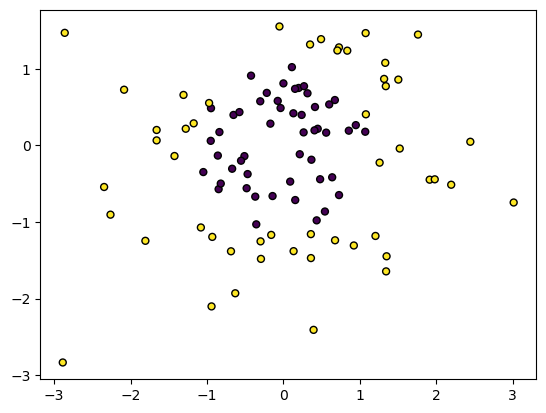

In [73]:
X1, Y1 = make_gaussian_quantiles(n_samples=n_samples,n_features=2, n_classes=2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

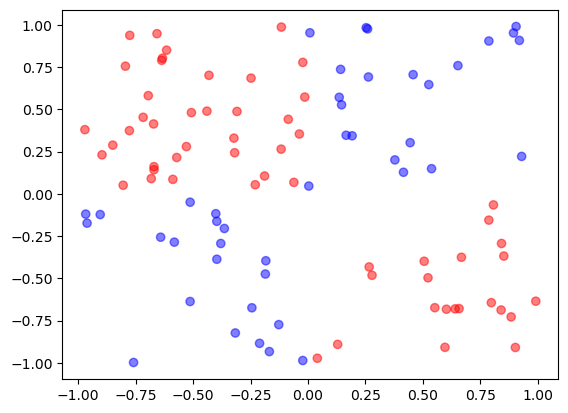

In [74]:
X2 = np.random.uniform(-1,1, size=(n_samples, n_classes))
mask = np.logical_or(np.logical_and(X2[:,0] > 0.0, X2[:,1] > 0.0), \
np.logical_and(X2[:,0] < 0.0, X2[:,1] < 0.0))
Y2 = np.eye(n_classes)[1*mask]

plt.scatter(X2[:,0], X2[:,1], c=Y2[:,0], cmap="bwr", alpha=0.5)
plt.show()

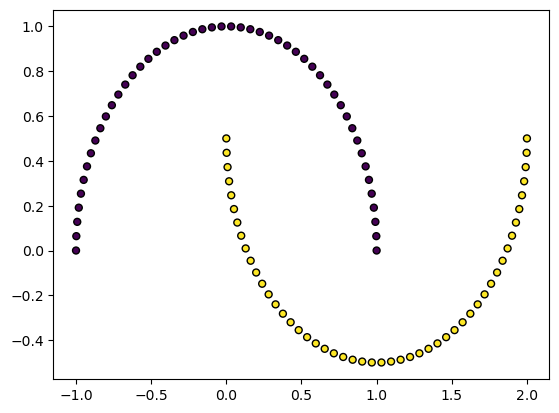

In [75]:
X3,Y3=make_moons(n_samples=n_samples,noise=0)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='k')

Разделяем данные на train/test

In [76]:
from sklearn.model_selection import train_test_split
X1_training_data, X1_test_data, Y1_training_data, Y1_test_data = train_test_split(X1, Y1, test_size = 0.2, train_size=0.8)
X2_training_data, X2_test_data, Y2_training_data, Y2_test_data = train_test_split(X2, Y2, test_size = 0.2, train_size=0.8)
X3_training_data, X3_test_data, Y3_training_data, Y3_test_data = train_test_split(X3, Y3, test_size = 0.2, train_size=0.8)

Метод ближайших соседей KNN для первого набора данных

In [77]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X1_training_data, Y1_training_data)
predictions = model.predict(X1_test_data)
print(predictions)


[0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1]


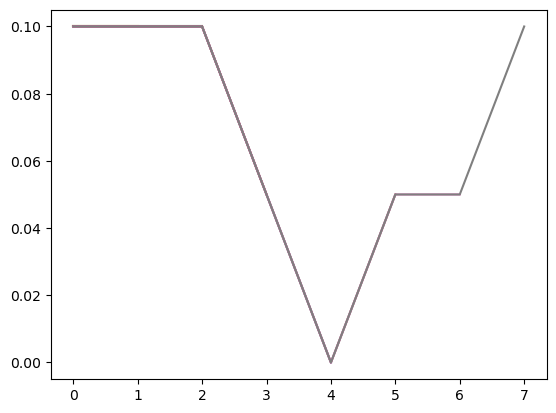

In [78]:
error_rates = []
for i in np.arange(1, 9): ##Для выбора оптимального значение используем метод "Локтя"
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X1_training_data, Y1_training_data)
    new_predictions = new_model.predict(X1_test_data)
    error_rates.append(np.mean(new_predictions != Y1_test_data))
    plt.plot(error_rates)

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y1_test_data, predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [80]:
print(confusion_matrix(Y1_test_data, predictions))

[[9 1]
 [1 9]]


Метод ближайших соседей KNN для второго набора данных

In [81]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X2_training_data, Y2_training_data)
predictions = model.predict(X2_test_data)
print(predictions)


[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


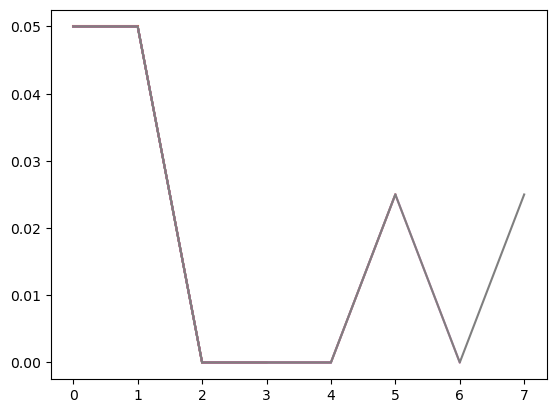

In [82]:
error_rates = []
for i in np.arange(1, 9): ##Для выбора оптимального значение используем метод "Локтя"
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X2_training_data, Y2_training_data)
    new_predictions = new_model.predict(X2_test_data)
    error_rates.append(np.mean(new_predictions != Y2_test_data))
    plt.plot(error_rates)

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y2_test_data, predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

   micro avg       0.95      0.95      0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20
 samples avg       0.95      0.95      0.95        20



In [84]:
print(confusion_matrix(
    Y2_test_data.argmax(axis=1), predictions.argmax(axis=1)) )

[[10  1]
 [ 0  9]]


Метод ближайших соседей KNN для третьего набора данных

In [85]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X3_training_data, Y3_training_data)
predictions = model.predict(X3_test_data)
print(predictions)


[1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0]


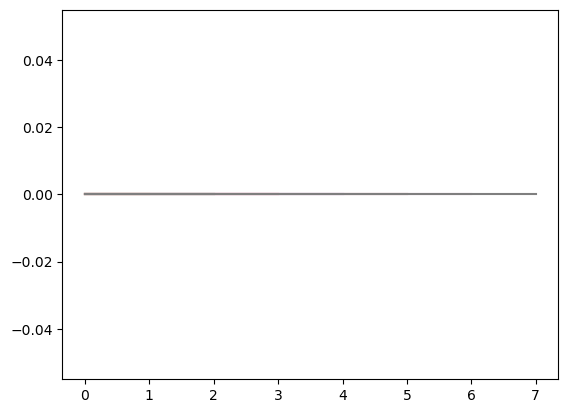

In [86]:
error_rates = []
for i in np.arange(1, 9): ##Для выбора оптимального значение используем метод "Локтя"
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X3_training_data, Y3_training_data)
    new_predictions = new_model.predict(X3_test_data)
    error_rates.append(np.mean(new_predictions != Y3_test_data))
    plt.plot(error_rates)

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y3_test_data, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [88]:
print(confusion_matrix(Y3_test_data, predictions))

[[ 9  0]
 [ 0 11]]


Задание 2 (20%). Метрики

In [89]:
##25 объектов классифицированы на 3 класса
C="Cat"
F="Fish"
H="Hen"
# истинные значения
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# результат системы
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

In [90]:
print(confusion_matrix(y_true,y_pred) )
print(classification_report(y_true,y_pred,digits=3) )

[[4 1 1]
 [6 2 2]
 [3 0 6]]
              precision    recall  f1-score   support

         Cat      0.308     0.667     0.421         6
        Fish      0.667     0.200     0.308        10
         Hen      0.667     0.667     0.667         9

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25



Задание 3 (50%). Линейная регрессия

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
raw_data = pd.read_csv('cats_vs_dogs.csv', index_col = 0)

Линейная регрессия для "n_pet_households"

In [100]:
raw_data = raw_data[ ['n_households','n_pet_households','n_dog_households','n_cat_households'] ]
Y = np.array(raw_data['n_households']).reshape(-1, 1)
X = np.array(raw_data['n_pet_households']).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

In [101]:
lr = LinearRegression()
model = lr.fit(X_train,Y_train)
##Предсказание 
skl_preds = model.predict(X_test)
print("Predictions")
print(skl_preds[:5])
print("")
print("")

##R^2
r_squared_pets = r2_score(Y_test,skl_preds)
print("r_squared=",r_squared_pets)


Predictions
[[ 890.96275259]
 [2163.05484419]
 [ 936.78739566]
 [6901.32293753]
 [ 201.76012084]]


r_squared= 0.9878641421823393


Линейная регрессия для "n_dog_households"

In [102]:
raw_data = raw_data[ ['n_households','n_pet_households','n_dog_households','n_cat_households'] ]
Y = np.array(raw_data['n_households']).reshape(-1, 1)
X = np.array(raw_data['n_dog_households']).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

In [103]:
lr = LinearRegression()
model = lr.fit(X_train,Y_train)
##Предсказание 
skl_preds = model.predict(X_test)
print("Predictions")
print(skl_preds[:5])
print("")
print("")

##R^2
r_squared_dogs = r2_score(Y_test,skl_preds)
print("r_squared=",r_squared_dogs)


Predictions
[[ 985.82328706]
 [2312.07239012]
 [1012.94494561]
 [5924.67730888]
 [ 286.08449648]]


r_squared= 0.9285827125797065


Линейная регрессия для "n_cat_households"

In [104]:
raw_data = raw_data[ ['n_households','n_pet_households','n_dog_households','n_cat_households'] ]
Y = np.array(raw_data['n_households']).reshape(-1, 1)
X = np.array(raw_data['n_cat_households']).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

In [105]:
lr = LinearRegression()
model = lr.fit(X_train,Y_train)
##Предсказание 
skl_preds = model.predict(X_test)
print("Predictions")
print(skl_preds[:5])
print("")
print("")

##R^2
r_squared_cats = r2_score(Y_test,skl_preds)
print("r_squared=",r_squared_cats)


Predictions
[[ 703.8584763 ]
 [2086.999006  ]
 [ 885.9427992 ]
 [7504.0076122 ]
 [ 136.59577804]]


r_squared= 0.9955581217807324


Сравнение R^2 всех взятых переменных

In [106]:
if(r_squared_pets > r_squared_dogs and r_squared_pets > r_squared_cats):
    print("r_squared_pets is the most precise")
if(r_squared_dogs > r_squared_pets  and r_squared_dogs > r_squared_cats):
    print("r_squared_dogs is the most precise")
if(r_squared_cats > r_squared_pets  and r_squared_cats > r_squared_dogs):
    print("r_squared_cats is the most precise")

r_squared_cats is the most precise
